In [1]:
import pandas as pd

# Caminho para o arquivo CSV (substitua pelo caminho correto)
caminho = ".\\ObesityDataSet_raw_and_data_sinthetic.csv"  # Exemplo de caminho no Windows

# Carregar o CSV para um DataFrame
df = pd.read_csv(caminho)

# Exibir as primeiras linhas do DataFrame
print(df.head())

   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Wei

Baixar o matplot

In [2]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: C:\Users\joaom\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Pré Processamento do Y

In [4]:
from sklearn.preprocessing import LabelEncoder

# Criar o codificador
label_encoder = LabelEncoder()

# Aplicar o Label Encoding na coluna 'Categoria'
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,1
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,1
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,1
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,5
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,4
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,4
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,4
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,4


Pré Processamento One Hot Encoding

In [5]:

colunas_para_codificar = ['Gender', 'family_history_with_overweight',
       'FAVC', 'CAEC', 'SMOKE', 'SCC',
       'CALC', 'MTRANS']

df = pd.get_dummies(df, columns=colunas_para_codificar)

df.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,True,...,False,False,False,False,True,False,False,False,True,False
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,True,...,True,False,False,True,False,False,False,False,True,False
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,False,...,False,False,True,False,False,False,False,False,True,False
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,False,...,False,False,True,False,False,False,False,False,False,True
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,False,...,False,False,False,True,False,False,False,False,True,False


Normalização dos Valores numéricos


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Criar o MinMaxScaler
scaler = MinMaxScaler()

# Colunas que você quer normalizar
columns_normalize = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Normalizar apenas as colunas selecionadas
df[columns_normalize] = scaler.fit_transform(df[columns_normalize])

# Exibir o DataFrame resultante
print(df.head())



        Age    Height    Weight  FCVC       NCP  CH2O       FAF  TUE  \
0  0.148936  0.320755  0.186567   0.5  0.666667   0.5  0.000000  0.5   
1  0.148936  0.132075  0.126866   1.0  0.666667   1.0  1.000000  0.0   
2  0.191489  0.660377  0.283582   0.5  0.666667   0.5  0.666667  0.5   
3  0.276596  0.660377  0.358209   1.0  0.666667   0.5  0.666667  0.0   
4  0.170213  0.622642  0.379104   0.5  0.000000   0.5  0.000000  0.0   

   NObeyesdad  Gender_Female  ...  SCC_yes  CALC_Always  CALC_Frequently  \
0           1           True  ...    False        False            False   
1           1           True  ...     True        False            False   
2           1          False  ...    False        False             True   
3           5          False  ...    False        False             True   
4           6          False  ...    False        False            False   

   CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0           False     True    

Análise de Correlação

In [7]:

# Calcular a correlação entre as variáveis
correlation_matrix = df.corr()

# Exibir a correlação entre as variáveis independentes e a variável alvo (y)
print(correlation_matrix['NObeyesdad'].sort_values(ascending=False))


NObeyesdad                            1.000000
Weight                                0.387641
CAEC_Sometimes                        0.316962
family_history_with_overweight_yes    0.313667
Age                                   0.235660
CALC_Sometimes                        0.114104
CH2O                                  0.108839
CAEC_no                               0.066715
SCC_no                                0.050679
CALC_Frequently                       0.047318
FAVC_yes                              0.044582
MTRANS_Automobile                     0.041170
Height                                0.039671
Gender_Male                           0.024908
SMOKE_no                              0.023256
FCVC                                  0.018597
MTRANS_Public_Transportation         -0.003748
MTRANS_Bike                          -0.017351
CALC_Always                          -0.022484
SMOKE_yes                            -0.023256
Gender_Female                        -0.024908
MTRANS_Motorb

Dividir dados em teste e treinamento

In [34]:
from sklearn.model_selection import train_test_split


X = df.drop('NObeyesdad', axis=1)  # Colunas de entrada
y = df['NObeyesdad']  # Target (saída)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Treinar Árvore de Decisão (Default)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Criar o modelo da árvore de decisão
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

# Treinar o modelo
dt_classifier.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = dt_classifier.predict(X_test)

# Exibir a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

# Exibir um relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))



Acurácia do modelo: 90.85%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        86
           1       0.80      0.78      0.79        93
           2       0.96      0.91      0.93       102
           3       0.94      0.97      0.96        88
           4       1.00      0.99      0.99        98
           5       0.83      0.80      0.81        88
           6       0.89      0.96      0.93        79

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



Treinar Árvore de Decisão ( Entropy)

In [36]:
# Criar o modelo da árvore de decisão
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Treinar o modelo
dt_classifier_entropy.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = dt_classifier_entropy.predict(X_test)

# Exibir a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

# Exibir um relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia do modelo: 94.32%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        86
           1       0.89      0.82      0.85        93
           2       1.00      0.94      0.97       102
           3       0.94      1.00      0.97        88
           4       1.00      0.99      0.99        98
           5       0.86      0.94      0.90        88
           6       0.99      0.96      0.97        79

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



KNN (5)

In [37]:
from sklearn.neighbors import KNeighborsClassifier


knn_5 = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo
knn_5.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn_5.predict(X_test)

# Avaliar a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

# Exibir um relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 78.55%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        86
           1       0.68      0.53      0.59        93
           2       0.77      0.77      0.77       102
           3       0.81      0.95      0.88        88
           4       0.96      0.99      0.97        98
           5       0.74      0.61      0.67        88
           6       0.73      0.72      0.73        79

    accuracy                           0.79       634
   macro avg       0.78      0.78      0.78       634
weighted avg       0.78      0.79      0.78       634



KNN(10)

In [38]:
from sklearn.neighbors import KNeighborsClassifier


knn_10 = KNeighborsClassifier(n_neighbors=10)

# Treinar o modelo
knn_10.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn_10.predict(X_test)

# Avaliar a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100:.2f}%")

# Exibir um relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 74.76%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        86
           1       0.77      0.44      0.56        93
           2       0.70      0.72      0.71       102
           3       0.75      0.97      0.84        88
           4       0.91      0.99      0.95        98
           5       0.72      0.57      0.64        88
           6       0.68      0.66      0.67        79

    accuracy                           0.75       634
   macro avg       0.75      0.75      0.73       634
weighted avg       0.75      0.75      0.74       634



MLP (Relu e 2 camadas ocultas)

In [47]:
from sklearn.neural_network import MLPClassifier


mlp_1 = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', max_iter=1000)
mlp_1.fit(X_train, y_train)
y_pred_1 = mlp_1.predict(X_test)


print("Arquitetura 1 (activation='relu'):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_1)*100:.2f}%")
print(classification_report(y_test, y_pred_1))

Arquitetura 1 (activation='relu'):
Acurácia: 92.90%
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.87      0.85      0.86        93
           2       0.95      0.96      0.96       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.85      0.86      0.86        88
           6       0.91      0.89      0.90        79

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



MLP (Relu 3 camadas)

In [48]:


mlp_2= MLPClassifier(hidden_layer_sizes=(100,50,25), activation='relu', max_iter=1000)
mlp_2.fit(X_train, y_train)
y_pred_2 = mlp_2.predict(X_test)

print("Arquitetura 2 (activation='relu'):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_2)*100:.2f}%")
print(classification_report(y_test, y_pred_2))

Arquitetura 2 (activation='relu'):
Acurácia: 94.16%
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        86
           1       0.92      0.87      0.90        93
           2       0.97      0.97      0.97       102
           3       0.96      0.99      0.97        88
           4       1.00      0.99      0.99        98
           5       0.82      0.91      0.86        88
           6       0.96      0.87      0.91        79

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



MLP (tahn e 2 camadas ocultas)

In [41]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(50,30), activation='tanh', max_iter=1000)
mlp_3.fit(X_train, y_train)
y_pred_3 = mlp_3.predict(X_test)

print("\nArquitetura 1 (activation='tanh'):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_3)*100:.2f}%")
print(classification_report(y_test, y_pred_3))


Arquitetura 1 (activation='tanh'):
Acurácia: 95.27%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        86
           1       0.93      0.90      0.92        93
           2       0.96      0.97      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.87      0.93      0.90        88
           6       0.96      0.90      0.93        79

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



MPL (tah e 3 camadas ocultas)

In [42]:
mlp_4 = MLPClassifier(hidden_layer_sizes=(100, 50,25), activation='tanh', max_iter=1000)
mlp_4.fit(X_train, y_train)
y_pred_4 = mlp_4.predict(X_test)

print("\nArquitetura 2 (activation='tanh'):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_4)*100:.2f}%")
print(classification_report(y_test, y_pred_4))


Arquitetura 2 (activation='tanh'):
Acurácia: 96.06%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        86
           1       0.94      0.91      0.93        93
           2       0.96      0.98      0.97       102
           3       0.98      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.90      0.94      0.92        88
           6       0.97      0.91      0.94        79

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



K-Means

In [43]:
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter
from sklearn import metrics



myset = set(y_train) 
clusters = len(myset) 

kmeans = KMeans(n_clusters = clusters)
kmeans = kmeans.fit(X_train)


labels = kmeans.labels_

map_labels = []

for i in range(clusters):
  map_labels.append([])

new_y_train = y_train.to_list()

for i in range(len(y_train)):
  for c in range(clusters):
    if labels[i] == c:
      map_labels[c].append(new_y_train[i])


mapping = {}

for i in range(clusters):
  final = Counter(map_labels[i])
  value = final.most_common(1)[0][0]
  mapping[i] = value

result = kmeans.predict(X_test)
result = [mapping[i] for i in result] ## mapeamento

acc = metrics.accuracy_score(result, y_test)
show = round(acc * 100)
print("Precisão : {}%".format(show))

print(list(result))
print(list(y_test))



Precisão : 38%
[2, 4, 3, 4, 3, 3, 3, 4, 2, 2, 3, 4, 2, 3, 4, 2, 4, 2, 3, 6, 3, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 1, 1, 4, 2, 3, 4, 3, 2, 3, 6, 3, 3, 2, 2, 4, 2, 3, 3, 4, 3, 3, 6, 2, 3, 3, 6, 2, 2, 4, 3, 6, 3, 3, 3, 4, 4, 2, 6, 6, 1, 2, 3, 3, 3, 4, 4, 3, 4, 2, 6, 2, 2, 2, 2, 4, 1, 3, 1, 2, 3, 2, 3, 6, 3, 2, 3, 3, 3, 2, 4, 2, 1, 2, 4, 4, 4, 3, 2, 4, 3, 4, 4, 2, 2, 3, 3, 3, 4, 3, 2, 4, 6, 2, 2, 2, 4, 3, 4, 3, 3, 6, 3, 4, 3, 4, 2, 4, 3, 4, 1, 3, 3, 3, 3, 4, 4, 2, 1, 2, 6, 3, 2, 2, 3, 3, 4, 4, 2, 3, 2, 1, 3, 2, 3, 3, 4, 1, 2, 2, 3, 4, 2, 1, 2, 6, 3, 2, 1, 3, 4, 4, 3, 3, 4, 4, 3, 2, 4, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 6, 3, 4, 4, 2, 1, 3, 2, 1, 3, 6, 3, 2, 4, 4, 3, 2, 3, 3, 1, 4, 4, 1, 3, 4, 1, 3, 4, 2, 4, 4, 3, 1, 2, 3, 4, 3, 3, 3, 1, 3, 4, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 4, 4, 3, 2, 3, 4, 4, 2, 4, 4, 3, 4, 3, 2, 3, 2, 3, 4, 2, 2, 4, 2, 3, 4, 4, 3, 2, 6, 6, 3, 3, 6, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 6, 3, 3, 6, 4, 3, 3, 3, 4, 3, 2, 2, 4, 3, 3, 4, 6, 4, 3, 3, 4, 2, 4, 

Protocolo Experimental

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

folds = 10
models = {
    "KMeans": kmeans,
    "Árvore de Decisão (gini)": dt_classifier,
    "Árvore de Decisão (entropy)": dt_classifier_entropy,
    "KNN (k=5)": knn_5,
    "KNN (k=10)": knn_10,
    "MLP ReLU (Arquitetura 1)": mlp_1,
    "MLP ReLU (Arquitetura 2)": mlp_2,
    "MLP tanh (Arquitetura 1)": mlp_3,
    "MLP tanh (Arquitetura 2)": mlp_4,
}

results = {}
mlp_errors = {}

# Aplicando K-Fold para cada modelo
for model_name, model in models.items():
    print(f"Treinando {model_name} com K-Fold...")

    if 'MLP' in model_name:
        model.set_params(verbose=False, warm_start=False)

    scores = cross_val_score(model, X, y, cv=folds, scoring='accuracy')

    results[model_name] = np.mean(scores)

    if 'MLP' in model_name:
        if model_name not in mlp_errors:
            mlp_errors[model_name] = []
        mlp_errors[model_name].append(model.loss_curve_)

for model_name, accuracy in results.items():
    print(f"{model_name}: Acurácia Média com K-Fold (10-fold) = {accuracy * 100:.2f}%")


Treinando KMeans com K-Fold...
Treinando Árvore de Decisão (gini) com K-Fold...
Treinando Árvore de Decisão (entropy) com K-Fold...
Treinando KNN (k=5) com K-Fold...
Treinando KNN (k=10) com K-Fold...
Treinando MLP ReLU (Arquitetura 1) com K-Fold...
Treinando MLP ReLU (Arquitetura 2) com K-Fold...
Treinando MLP tanh (Arquitetura 1) com K-Fold...
Treinando MLP tanh (Arquitetura 2) com K-Fold...
KMeans: Acurácia Média com K-Fold (10-fold) = 13.22%
Árvore de Decisão (gini): Acurácia Média com K-Fold (10-fold) = 93.37%
Árvore de Decisão (entropy): Acurácia Média com K-Fold (10-fold) = 94.27%
KNN (k=5): Acurácia Média com K-Fold (10-fold) = 78.55%
KNN (k=10): Acurácia Média com K-Fold (10-fold) = 74.29%
MLP ReLU (Arquitetura 1): Acurácia Média com K-Fold (10-fold) = 93.43%
MLP ReLU (Arquitetura 2): Acurácia Média com K-Fold (10-fold) = 94.04%
MLP tanh (Arquitetura 1): Acurácia Média com K-Fold (10-fold) = 95.22%
MLP tanh (Arquitetura 2): Acurácia Média com K-Fold (10-fold) = 94.75%


Relatório


Resultados Finais (Acurácia Média em 10 folds):
KMeans: Acurácia: 13.22%
Árvore de Decisão (gini): Acurácia: 93.37%
Árvore de Decisão (entropy): Acurácia: 94.27%
KNN (k=5): Acurácia: 78.55%
KNN (k=10): Acurácia: 74.29%
MLP ReLU (Arquitetura 1): Acurácia: 93.43%
MLP ReLU (Arquitetura 2): Acurácia: 94.04%
MLP tanh (Arquitetura 1): Acurácia: 95.22%
MLP tanh (Arquitetura 2): Acurácia: 94.75%


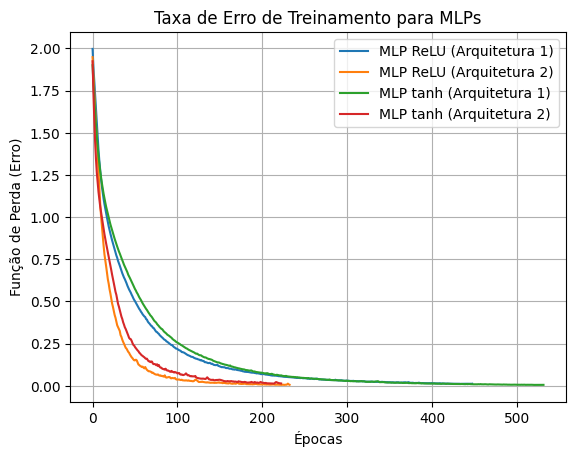


Tabela de Resultados:
                             Acurácia Média  Taxa de Erro Média
MLP tanh (Arquitetura 1)          95.223330            4.776670
MLP tanh (Arquitetura 2)          94.749620            5.250380
Árvore de Decisão (entropy)       94.271439            5.728561
MLP ReLU (Arquitetura 2)          94.041402            5.958598
MLP ReLU (Arquitetura 1)          93.425959            6.574041
Árvore de Decisão (gini)          93.372753            6.627247
KNN (k=5)                         78.552267           21.447733
KNN (k=10)                        74.287982           25.712018
KMeans                            13.217607           86.782393


In [44]:
import matplotlib.pyplot as plt


# 7. Exibir os resultados finais
print("\nResultados Finais (Acurácia Média em 10 folds):")
for model_name, accuracy in results.items():
    print(f"{model_name}: Acurácia: {accuracy * 100:.2f}%")

# 8. Gráfico de Taxa de Erro para MLPs
for model_name, loss_curves in mlp_errors.items():
    if len(loss_curves) > 0:
        avg_loss_curve = np.mean(loss_curves, axis=0)  # Média da perda ao longo das épocas
        epochs = np.arange(len(avg_loss_curve))  # Número de épocas
        plt.plot(epochs, avg_loss_curve, label=model_name)

plt.title('Taxa de Erro de Treinamento para MLPs')
plt.xlabel('Épocas')
plt.ylabel('Função de Perda (Erro)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 9. Tabela com as Taxas de Erro/Acerto para cada algoritmo
results_table = pd.DataFrame.from_dict(results, orient='index', columns=['Acurácia Média'])
results_table['Taxa de Erro Média'] = 1 - results_table['Acurácia Média']
results_table = results_table.sort_values(by='Acurácia Média', ascending=False)

# Exibir tabela
print("\nTabela de Resultados:")
print(results_table * 100)  # Multiplicar por 100 para mostrar como percentual